<a href="https://colab.research.google.com/github/savig-vi/SVM/blob/main/SMV_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Thư viện hỗ trợ chuẩn hóa Z-score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amateurdev29/doan_ttnt1/main/Hotel%20Reservations.csv',encoding='unicode_escape')
df = pd.DataFrame(data)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df = df.drop('Booking_ID', axis=1)

In [4]:
df['type_of_meal_plan'].unique

<bound method Series.unique of 0         Meal Plan 1
1        Not Selected
2         Meal Plan 1
3         Meal Plan 1
4        Not Selected
             ...     
36270     Meal Plan 1
36271     Meal Plan 1
36272     Meal Plan 1
36273    Not Selected
36274     Meal Plan 1
Name: type_of_meal_plan, Length: 36275, dtype: object>

In [5]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [6]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [7]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [8]:
type_of_meal_plan_mapping = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2, 'Meal Plan 3':3}
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(type_of_meal_plan_mapping)

room_type_reserved_mapping = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6,'Room_Type 7':7}
df['room_type_reserved'] = df['room_type_reserved'].map(room_type_reserved_mapping)

market_segment_type_mapping = {'Online':1, 'Offline':2, 'Corporate':3, 'Complementary':4, 'Aviation':5}
df['market_segment_type'] = df['market_segment_type'].map(market_segment_type_mapping)

booking_status_mapping = {'Canceled':0, 'Not_Canceled':1}
df['booking_status'] = df['booking_status'].map(booking_status_mapping)

In [9]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,1
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,1
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,0
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,0
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,167.80,1,1
36271,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,90.95,2,0
36272,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.39,2,1
36273,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.50,0,0


In [10]:
# Hàm isna() dùng để kiểm tra giá trị thiếu, ở đây kiểm tra giá trị thiếu của từng cột và đếm tổng số lượng thiếu từng cột
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
df.fillna(df.mean(), inplace=True, axis=0) # tính theo giá trị trung bình của cột
df = df.round()
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.0,0,1
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,107.0,1,1
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.0,0,0
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.0,0,0
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,168.0,1,1
36271,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,91.0,2,0
36272,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.0,2,1
36273,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.0,0,0


In [12]:
X = df.iloc[:, :17]
y = df.iloc[:,17]

scaler = StandardScaler() # X_std = (X - X.mean(axis=0)) / X.std(axis=0)
X = scaler.fit_transform(X)
X

array([[ 0.29889263, -0.26147045,  0.2174012 , ..., -0.08745646,
        -1.09487999, -0.78813999],
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.08745646,
         0.10221616,  0.48376045],
       [-1.62897546, -0.26147045,  1.36599262, ..., -0.08745646,
        -1.23739144, -0.78813999],
       ...,
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.08745646,
        -0.15430444,  1.75566089],
       [ 0.29889263, -0.26147045, -0.93119021, ..., -0.08745646,
        -0.2683136 , -0.78813999],
       [ 0.29889263, -0.26147045,  0.2174012 , ..., -0.08745646,
         1.66984208, -0.78813999]])

In [13]:
pca = PCA()

In [14]:
pca.fit(X)

PCA()

In [15]:
X_pca = pca.transform(X)
X_pca

array([[ 1.27324909, -1.73232656,  1.55397087, ...,  0.49398249,
        -0.19002035,  0.70016109],
       [-0.73486229,  0.0026707 , -1.48616933, ..., -0.62315724,
         0.412619  , -0.00541127],
       [ 0.97204015, -0.48097398, -1.8501467 , ...,  0.72767519,
        -0.3999043 , -0.71358032],
       ...,
       [-1.17809365, -0.30378542, -0.46227614, ..., -0.30192783,
        -0.02797862,  0.19214517],
       [-0.0680554 , -0.30976239, -2.14667126, ...,  0.01627064,
        -0.14158215,  0.3696921 ],
       [-0.35101354, -0.54474699,  1.13315977, ..., -0.95333305,
         0.46531896,  0.88330884]])

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.15331332, 0.11084361, 0.08568005, 0.07809   , 0.07570587,
       0.06076064, 0.05902333, 0.05666024, 0.05277977, 0.04720169,
       0.04457909, 0.04177112, 0.03513838, 0.02890893, 0.02621508,
       0.02502761, 0.01830127])

In [17]:
n_components = 10
pca = PCA(n_components=n_components)

# Huấn luyện PCA trên dữ liệu ban đầu
pca.fit(X)

# Lấy dữ liệu mới từ PCA
X_pca = pca.transform(X)

In [18]:
X_pca

array([[ 1.27324909, -1.73232656,  1.55397087, ..., -0.2401862 ,
        -0.3486002 , -0.48295011],
       [-0.73486229,  0.0026707 , -1.48616933, ..., -0.32003607,
         0.04956034, -0.33766255],
       [ 0.97204015, -0.48097398, -1.8501467 , ..., -0.19587622,
        -0.2471444 , -1.04239282],
       ...,
       [-1.17809365, -0.30378542, -0.46227614, ..., -1.29797117,
         0.08294346,  0.43594215],
       [-0.0680554 , -0.30976239, -2.14667126, ...,  0.58998761,
         0.19056519,  1.47425014],
       [-0.35101354, -0.54474699,  1.13315977, ...,  0.73134276,
         0.98309784, -0.34700252]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state = 42)

svm = SVC()

parameters_dictionary = {'kernel':['poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(svm,
                           parameters_dictionary, 
                           scoring = 'f1',
                           return_train_score=True, 
                           cv = 5,
                           verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...kernel=poly;, score=(train=0.860, test=0.849) total time=  23.1s
[CV 2/5] END ...kernel=poly;, score=(train=0.858, test=0.855) total time=  15.3s
[CV 3/5] END ...kernel=poly;, score=(train=0.856, test=0.857) total time=  15.6s
[CV 4/5] END ...kernel=poly;, score=(train=0.857, test=0.855) total time=  14.6s
[CV 5/5] END ...kernel=poly;, score=(train=0.857, test=0.860) total time=  15.7s
[CV 1/5] END ....kernel=rbf;, score=(train=0.884, test=0.874) total time=  15.0s
[CV 2/5] END ....kernel=rbf;, score=(train=0.882, test=0.879) total time=  14.9s
[CV 3/5] END ....kernel=rbf;, score=(train=0.883, test=0.879) total time=  14.9s
[CV 4/5] END ....kernel=rbf;, score=(train=0.884, test=0.875) total time=  14.6s
[CV 5/5] END ....kernel=rbf;, score=(train=0.881, test=0.881) total time=  14.4s
[CV 1/5] END kernel=sigmoid;, score=(train=0.752, test=0.756) total time=  18.5s
[CV 2/5] END kernel=sigmoid;, score=(train=0.767,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='f1', verbose=3)

In [20]:
grid_search.best_estimator_.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [21]:
grid_save = grid_search
joblib.dump(grid_save, '/content/drive/MyDrive/ColabNotebooks/grid.joblib')

['/content/drive/MyDrive/ColabNotebooks/grid.joblib']

In [22]:
grid_load = joblib.load('/content/drive/MyDrive/ColabNotebooks/grid.joblib')

In [23]:
y_pred = grid_load.best_estimator_.predict(X_test)

In [24]:
best_parameters = grid_load.best_params_ # Show the best hyperparameters for SVC
best_f1 = grid_load.best_score_ # Show the best f1-score 

print('The best model was:', grid_load.best_estimator_)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: SVC()
The best parameter values were: {'kernel': 'rbf'}
The best f1-score was: 0.8776239929836859


In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In ra màn hình các thông số đánh giá
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8298263346503721
Precision: 0.842251388187784
Recall: 0.917262231995602
F1-Score: 0.878157894736842


In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2357, 1250],
       [ 602, 6674]])

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      3607
           1       0.84      0.92      0.88      7276

    accuracy                           0.83     10883
   macro avg       0.82      0.79      0.80     10883
weighted avg       0.83      0.83      0.83     10883



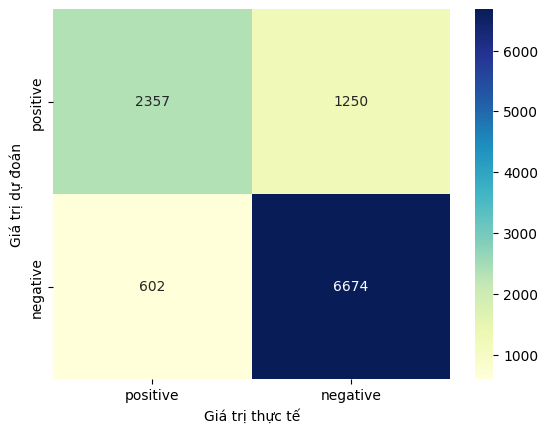

In [31]:
print(classification_report(y_test,y_pred))

# Tùy chỉnh màu sắc
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', xticklabels=['positive', 'negative'] ,yticklabels=['positive', 'negative'])

plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')

# Hiển thị biểu đồ
plt.show()

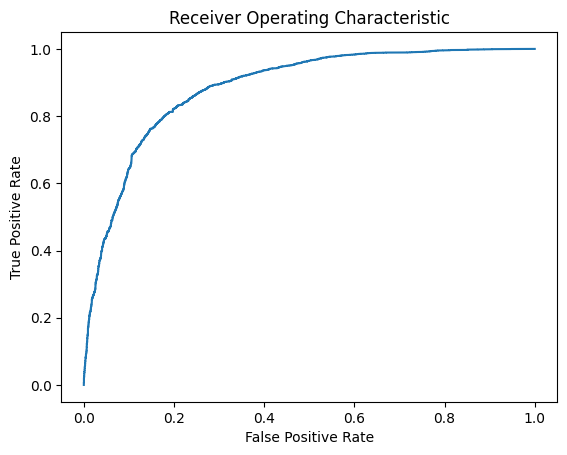

AUC-ROC: 0.8845409398041466


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dự đoán xác suất dương tính cho dữ liệu kiểm tra
y_scores = grid_load.best_estimator_.decision_function(X_test)

# Tính các giá trị cần thiết cho đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Vẽ đường cong ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

# Tính diện tích dưới đường cong ROC (AUC-ROC)
auc_roc = roc_auc_score(y_test, y_scores)
print('AUC-ROC:', auc_roc)